**1).Problem Statement**


```
Flight dealy problem
```



**Loading Packages and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flights_data = pd.read_csv('/content/drive/MyDrive/Flight Project /DataSet/flights.csv')
airports_data=pd.read_csv('/content/drive/MyDrive/Flight Project /DataSet/airports.csv')
airlines_data=pd.read_csv('/content/drive/MyDrive/Flight Project /DataSet/airlines.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print('flights dataset size',flights_data.shape)
print('airports dataset size',airports_data.shape)
print('airlines dataset size', airlines_data.shape)

flights dataset size (5819079, 31)
airports dataset size (322, 7)
airlines dataset size (14, 2)


***Observations:***


```
This shows that the train and test data is imported successfully.

The flight  data consists of 5819079 training examples with 31 features.

The airport  data consists of 322 training examples with 7 features

The airline   data consists of 14 training examples with 2 features
```



**Exploratory Data Analysis**

In [ ]:
flights_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
airports_data.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [ ]:
airlines_data.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

**Introduction to dataset**


```
1.YEAR- scheduled year of flight arrival/departure 
2.MONTH-scheduled month of flight arrival/departure 
3.DAY-schedualed day of flight arrival/departure 
4.DAY_OF_WEEK-schedualed day of week of flight arrival/departure
5.AIRLINE-airline operating the flight/An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight
6.FLIGHT_NUMBER-a flight number or flight designator is a code for an airline service consisting of two-character airline designator and a 1 to 4 digit number. For example, "BA 98"
7.TAIL_NUMBER-A tail number is an alphanumeric code between two and six characters in length used to identify a specific airplane. The alphabetical prefix of a tail number is indicative of an airplane's country of origin. All United States-based tail numbers begin with “N,” Canadian planes begin with “C,” German
8.ORIGIN_AIRPORT-Starting point 
9.DESTINATION_AIRPORT-End point 
10.SCHEDULED_DEPARTURE-Scheduled Departure Date means the date on which You are originally scheduled to leave on the Trip.
11.DEPARTURE_TIME-the time at which a public conveyance is scheduled to depart from a given point of origin
12.DEPARTURE_DELAY-departure delay refers to your transport i.e. flight, ferry or cruise ship being delayed, through no fault of your own, beyond your scheduled departure time.
13.TAXI_OUT-The Taxi-out time is defined as the time spent by a flight between its actual off-block time (AOBT) and actual take-off time (ATOT)/The difference between the Wheels Off time and Gate Out time, in minutes.
14.WHEELS_OFF- The time an aircraft takes off
15.SCHEDULED_TIME-the scheduled time: the arranged time, the planned time. noun. Please arrive at the scheduled time. We arranged to meet at 2pm, please don't be late.
16.ELAPSED_TIME-Elapsed time is the amount of time that passes from the start of an event to its finish.
17.AIR_TIME-Air time is the elapsed time that the aircraft is airborne, regardless of what time-zone the flight began and ended in
18.DISTANCE-distance between starting point and ending point 
19.WHEELS_ON
20.TAXI_IN-The difference between the Wheels On time and Gate In time, in minutes
21.SCHEDULED_ARRIVAL-Scheduled Arrival Time means the arrival time as stated in the original ticket at the time of booking.
22.ARRIVAL_TIME-the time when someone or something arrives, arrived, or will arrive. information on bus arrival and departure times
23.ARRIVAL_DELAY-Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.
24.DIVERTED
25.CANCELLED
26.CANCELLATION_REASON
27.AIR_SYSTEM_DELAY
28.SECURITY_DELAY
29.AIRLINE_DELAY-A flight delay is when an airline flight takes off and/or lands later than its scheduled time
30.LATE_AIRCRAFT_DELAY-Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late
31.WEATHER_DELAY
```



In [ ]:
airports_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
airports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [ ]:
airports_data.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [ ]:
airports_data.dropna(axis=0,inplace=True )

In [ ]:
airports_data.isnull().sum().sum()

0

In [ ]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [ ]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

***observations***


```
here total 31 columns 
There are 16 float type variable ,10 int type and 5 object type
```

 

**Missing value**

In [ ]:
missing_values=pd.DataFrame()
missing_values['feature']=flights_data.columns
missing_values['N_Missing']=flights_data.isnull().sum().values
missing_values['M_Precent']=flights_data.isnull().sum().values*100/flights_data.shape[0]
missing_values

,feature,N_Missing,M_Precent
0,YEAR,0,0.000000
1,MONTH,0,0.000000
2,DAY,0,0.000000
3,DAY_OF_WEEK,0,0.000000
4,AIRLINE,0,0.000000
5,FLIGHT_NUMBER,0,0.000000
6,TAIL_NUMBER,14721,0.252978
7,ORIGIN_AIRPORT,0,0.000000
8,DESTINATION_AIRPORT,0,0.000000
9,SCHEDULED_DEPARTURE,0,0.000000


***Observations***


```
As we can see, we have several features that present missing values. The reason these values are missing could be:
-randomly missed information due to the acquision process
-values are missed depends on the data (for example canceled flights do not have a take-off time, flights that took off do not have a cancellation reason, etc).

To know what method to use to solve the missing values problem a further investigation of the data should be done

Lets focuse on the number of canceled flights and see if it is correlated with the missing values of some of the features:
```



In [ ]:
flights_data['CANCELLED'].unique()

array([0, 1])

***Observations***


```
we have only two type of data in cancelled feature 
flight cancelled =1
flight not cancelled =0
```



In [ ]:
flights_data[flights_data['CANCELLED']==1].shape[0]

89884

***Observation***


```
89884 flignts cancelled in fligt data set 
```

 

In [ ]:
flights_data[flights_data['CANCELLED']==1].isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
TAXI_OUT               89047
WHEELS_OFF             89047
SCHEDULED_TIME             5
ELAPSED_TIME           89884
AIR_TIME               89884
DISTANCE                   0
WHEELS_ON              89884
TAXI_IN                89884
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           89884
ARRIVAL_DELAY          89884
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY       89884
SECURITY_DELAY         89884
AIRLINE_DELAY          89884
LATE_AIRCRAFT_DELAY    89884
WEATHER_DELAY          89884
dtype: int64

***Observation***


```
for some features all the missing data are caused by the cancellation of the flight. These features are:
 'TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF'.

for some features a great part of missing data is caused by the cancellation of the flight like: 
'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'.

for some features the missing values caused by the cancellation of the flight counts for a little % of the total missing values. These features are:
 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', and 'WEATHER_DELAY'.

All the records of the cancelled flights have cancellation_reason
```



Lets now investigate the diverted flights.

In [ ]:
flights_data['DIVERTED'].unique()

array([0, 1])

***Observations***


```
we have found two unique vale 1 and 0
diverted=1
not diverted=1
```



In [ ]:
flights_data[flights_data['DIVERTED']==1].shape[0]

15187

***Observation***


```
We have a total of 15187 diverted flight
```



In [ ]:
flights_data[flights_data['DIVERTED']==1].isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             1
ELAPSED_TIME           15187
AIR_TIME               15187
DISTANCE                   0
WHEELS_ON               2629
TAXI_IN                 2629
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2629
ARRIVAL_DELAY          15187
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    15187
AIR_SYSTEM_DELAY       15187
SECURITY_DELAY         15187
AIRLINE_DELAY          15187
LATE_AIRCRAFT_DELAY    15187
WEATHER_DELAY          15187
dtype: int64

***Observations***


```
for the features in which the number of missing values is mostly caused by the cancellation of the flight, the rest of the missing values is caused by the diverted flights.

For features: 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', and 'WEATHER_DELAY' the missing values of the diverted flights is only a small % of the overall missing values.
```



Lets see the flights that have a positive delay

In [ ]:
flights_data['ARRIVAL_DELAY']

0         -22.0
1          -9.0
2           5.0
3          -9.0
4         -21.0
           ... 
5819074   -26.0
5819075   -16.0
5819076    -8.0
5819077   -10.0
5819078     2.0
Name: ARRIVAL_DELAY, Length: 5819079, dtype: float64

In [ ]:
flights_data[flights_data['ARRIVAL_DELAY']>0].shape[0]

2086896

***Observations***

```
2086896 flights are reach the origin point with delay time greter 0
```



In [ ]:
flights_data['DEPARTURE_DELAY']

0         -11.0
1          -8.0
2          -2.0
3          -5.0
4          -1.0
           ... 
5819074    -4.0
5819075    -4.0
5819076    -9.0
5819077    -6.0
5819078    15.0
Name: DEPARTURE_DELAY, Length: 5819079, dtype: float64

In [ ]:
flights_data[flights_data['DEPARTURE_DELAY']>0].shape[0]

2125618

***Observations***


```
2125618 flights are fly the origin point with delay time greter 0
```



In [ ]:
flights_data[flights_data['DEPARTURE_DELAY']>0].isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                  2062
WHEELS_OFF                2062
SCHEDULED_TIME               3
ELAPSED_TIME             10569
AIR_TIME                 10569
DISTANCE                     0
WHEELS_ON                 4285
TAXI_IN                   4285
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              4285
ARRIVAL_DELAY            10569
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    2123078
AIR_SYSTEM_DELAY       1174745
SECURITY_DELAY         1174745
AIRLINE_DELAY          1174745
LATE_AIRCRAFT_DELAY    1174745
WEATHER_DELAY          1174745
dtype: int64

In [ ]:
flights_data[flights_data['ARRIVAL_DELAY']>0].isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    2086896
AIR_SYSTEM_DELAY       1023457
SECURITY_DELAY         1023457
AIRLINE_DELAY          1023457
LATE_AIRCRAFT_DELAY    1023457
WEATHER_DELAY          1023457
dtype: int64

In [ ]:
flights_data[flights_data['ARRIVAL_DELAY']>0].head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


***Observations***


```
As given in the example, we still have a big part of missing values in the features:
 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', and 'WEATHER_DELAY'. 
 Therefore, I propose to drop these features. As for others, I think we should devide the data set into 3 parts: normal flights, cancelled flights, and diverted flights. Because each category has its features.
```



Lets check for duplicated values.

In [ ]:
flights_data.duplicated().sum()

0

***Observations***


```
In the dataset no  duplicated value
```

 

**Data Cleaning**

Missing value


```
To treat the problem of missing values I propose to divide the table into 3 sets:
the normal set, the diverted flights set, and the canceled flights set.
This allows us to keep consistent data structure without missing records.
Normally, when the part of the data represent a low number of records with alot of missing values we drop these records in we have an intially big dataset. 
In this case, we could drop the diverted and the canceled flights because they represent less than 2% of all data. However, I prefer to keep these entries in different tables so we can analyze them.
```



In [ ]:
canceled_flights = flights_data[flights_data['CANCELLED']==1]
diverted_flights = flights_data[flights_data['DIVERTED']==1]
canceled_flights.shape[0], diverted_flights.shape[0], flights_data.shape[0]

(89884, 15187, 5819079)

In [ ]:
#precent data
89884*100/5819079 ,15187*100/5819079

(1.5446430612129514, 0.26098631759424473)

In [ ]:
cleaned_flights=flights_data.drop(canceled_flights.index)

In [ ]:
cleaned_flights=cleaned_flights.drop(diverted_flights.index)

Test

In [ ]:
canceled_flights.shape[0]+diverted_flights.shape[0]+cleaned_flights.shape[0]==flights_data.shape[0]

True

**Now work on the dataset of  canceled_flights** 

In [ ]:
canceled_flights.shape

(89884, 31)

In [ ]:
m_precent_canceled=canceled_flights.isnull().sum()*100/canceled_flights.shape[0]
m_precent_canceled

YEAR                     0.000000
MONTH                    0.000000
DAY                      0.000000
DAY_OF_WEEK              0.000000
AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
TAIL_NUMBER             16.377776
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME          95.849094
DEPARTURE_DELAY         95.849094
TAXI_OUT                99.068800
WHEELS_OFF              99.068800
SCHEDULED_TIME           0.005563
ELAPSED_TIME           100.000000
AIR_TIME               100.000000
DISTANCE                 0.000000
WHEELS_ON              100.000000
TAXI_IN                100.000000
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME           100.000000
ARRIVAL_DELAY          100.000000
DIVERTED                 0.000000
CANCELLED                0.000000
CANCELLATION_REASON      0.000000
AIR_SYSTEM_DELAY       100.000000
SECURITY_DELAY         100.000000
AIRLINE_DELAY          100.000000
LATE_AIRCRAFT_



```
Remove the columns which have  more than 30% data missing 
```



***Observations***


```
We only get to keep the Tail number and the scheduled time. All other features are to drop. 
However, since we cannot find a way to fill the missing values of the tail number, this feature is also dropped.
```



In [ ]:
drop_cols=m_precent_canceled[m_precent_canceled>1].index
drop_cols

Index(['TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
canceled_flights.drop(drop_cols,axis=1,inplace=True)
canceled_flights.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(89884, 15)

In [ ]:
canceled_flights['SCHEDULED_TIME'].mode()

0    85.0
dtype: float64

In [ ]:
canceled_flights['SCHEDULED_TIME']=canceled_flights['SCHEDULED_TIME'].fillna(85)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
canceled_flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

Now, we have fixed the canceled flights table. Lets move to the **diverted flights** table.

In [ ]:
diverted_flights.shape

(15187, 31)

In [ ]:
m_precent_diverted=diverted_flights.isnull().sum()*100/diverted_flights.shape[0]
m_precent_diverted

YEAR                     0.000000
MONTH                    0.000000
DAY                      0.000000
DAY_OF_WEEK              0.000000
AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
TAIL_NUMBER              0.000000
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME           0.000000
DEPARTURE_DELAY          0.000000
TAXI_OUT                 0.000000
WHEELS_OFF               0.000000
SCHEDULED_TIME           0.006585
ELAPSED_TIME           100.000000
AIR_TIME               100.000000
DISTANCE                 0.000000
WHEELS_ON               17.310858
TAXI_IN                 17.310858
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME            17.310858
ARRIVAL_DELAY          100.000000
DIVERTED                 0.000000
CANCELLED                0.000000
CANCELLATION_REASON    100.000000
AIR_SYSTEM_DELAY       100.000000
SECURITY_DELAY         100.000000
AIRLINE_DELAY          100.000000
LATE_AIRCRAFT_



```
Remove the columns which have  more than 30% data missing 
```



In [ ]:
drop_cols=m_precent_diverted[m_precent_diverted>30].index
drop_cols

Index(['ELAPSED_TIME', 'AIR_TIME', 'ARRIVAL_DELAY', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
diverted_flights.drop(drop_cols,axis=1,inplace=True)
diverted_flights.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(15187, 22)

In [ ]:
diverted_flights.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            1
DISTANCE                  0
WHEELS_ON              2629
TAXI_IN                2629
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME           2629
DIVERTED                  0
CANCELLED                 0
dtype: int64

**Observations**


```
Lets try to understand the relationship between the rest Scheduled arrival and the missing values of arrival time, wheels on, and taxi in that are time based features about the flight landing
```



In [ ]:
diverted_flights[['SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'WHEELS_ON', 'TAXI_IN']]

,SCHEDULED_ARRIVAL,ARRIVAL_TIME,WHEELS_ON,TAXI_IN
724,1009,1451.0,1447.0,4.0
1455,1041,1505.0,1456.0,9.0
2218,1000,1219.0,1214.0,5.0
2526,1017,1319.0,1314.0,5.0
2866,1135,1343.0,1340.0,3.0
...,...,...,...,...
5813860,2141,NaN,NaN,NaN
5815052,1720,NaN,NaN,NaN
5816657,2026,2216.0,2212.0,4.0
5817342,2113,2250.0,2247.0,3.0


**Observations**


```
As we can see the Taxi in means the duration of time between the arrival and the wheels on instant. 
This feature could be imputed using the mode value we can even fine tune this imputation by computing the mean value by arrival aeroport, 
since this time is basically a caracteristic of the aeroport mixed with some weather.

for the arrival time, the imputation is quite tricky. I propose to compute the difference in duration between the scheduled arrival and the arrival time. 
Then, use the median value and add it to the schedule time to imputate the arrival time.

As for the wheels on it is simply the arrival time minus the taxi in.
```



***Mathematical Observations***


```
impute the taxi in with the mode of all arrival aeroport.
compute the median difference between the scheduled arrival and the arrival time
impute the arrival time = median difference + scheduled arrival
impute wheels on = arrival time - taxi in.
```



In [ ]:
diverted_flights['TAXI_IN'] = diverted_flights['TAXI_IN'].fillna(diverted_flights['TAXI_IN'].mode()[0])
diverted_flights['TAXI_IN'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [ ]:
arrival_delay=diverted_flights['ARRIVAL_TIME']-diverted_flights['SCHEDULED_ARRIVAL']
arrival_delay.median()

237.0

In [ ]:
diverted_flights['ARRIVAL_TIME']=diverted_flights.apply(lambda x: x['SCHEDULED_ARRIVAL']+237 if np.isnan(x['ARRIVAL_TIME']) else x['ARRIVAL_TIME'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
diverted_flights['WHEELS_ON']=diverted_flights.apply(lambda x: x['ARRIVAL_TIME']-x['TAXI_IN'] if np.isnan(x['WHEELS_ON']) else x['WHEELS_ON'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
diverted_flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         1
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
DIVERTED               0
CANCELLED              0
dtype: int64

Impute the Scheduled time with the mode.

In [ ]:
diverted_flights['SCHEDULED_TIME'].mode()

0    140.0
dtype: float64

In [ ]:
diverted_flights['SCHEDULED_TIME']=diverted_flights['SCHEDULED_TIME'].fillna(140)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
diverted_flights.isnull().sum().sum()

0



```
Now, we have to fix the arrival time and the wheels on time. 
These features are numerical and represent the time in a hhmm format.

fix the arrival time and the wheels on
```



In [ ]:
def fix_time(x): 
    if x%100>=60: 
        x=x+40
    if x//100>=24:
        x=x-2400
    return x

In [ ]:
diverted_flights['ARRIVAL_TIME'] = diverted_flights['ARRIVAL_TIME'].apply(fix_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
diverted_flights['WHEELS_ON'] = diverted_flights['WHEELS_ON'].apply(fix_time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
diverted_flights['WHEELS_ON'].describe()

count    15187.000000
mean      1517.064331
std        669.211384
min          0.000000
25%       1155.000000
50%       1700.000000
75%       2038.000000
max       2359.000000
Name: WHEELS_ON, dtype: float64

**Cleaned Flights Table**



```
Remove the columns which have  more than 30% data missing 
```



In [ ]:
m_precent_cleaned=cleaned_flights.isnull().sum()*100/cleaned_flights.shape[0]
m_precent_cleaned

YEAR                     0.000000
MONTH                    0.000000
DAY                      0.000000
DAY_OF_WEEK              0.000000
AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
TAIL_NUMBER              0.000000
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME           0.000000
DEPARTURE_DELAY          0.000000
TAXI_OUT                 0.000000
WHEELS_OFF               0.000000
SCHEDULED_TIME           0.000000
ELAPSED_TIME             0.000000
AIR_TIME                 0.000000
DISTANCE                 0.000000
WHEELS_ON                0.000000
TAXI_IN                  0.000000
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME             0.000000
ARRIVAL_DELAY            0.000000
DIVERTED                 0.000000
CANCELLED                0.000000
CANCELLATION_REASON    100.000000
AIR_SYSTEM_DELAY        81.388913
SECURITY_DELAY          81.388913
AIRLINE_DELAY           81.388913
LATE_AIRCRAFT_

In [ ]:
drop_cols=m_precent_cleaned[m_precent_cleaned>30].index
drop_cols

Index(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
cleaned_flights.drop(drop_cols,axis=1,inplace=True)

In [ ]:
cleaned_flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

**Observations**


```
In the obtained table we have features with unique values: DIVERTED and CANCELLED in all three tables. 
Since we divided each category in a table, I propose to drop these feature

drop the 'DIVERTED' and 'CANCELLED' features from all tables.
```



In [ ]:
cleaned_flights = cleaned_flights.drop(['DIVERTED', 'CANCELLED'], axis=1)
diverted_flights = diverted_flights.drop(['DIVERTED', 'CANCELLED'], axis=1)
canceled_flights = canceled_flights.drop(['DIVERTED', 'CANCELLED'], axis=1)

Before moving to the analysis part, lets save these dataframes.

In [ ]:
cleaned_flights.to_csv('canceled_flights.csv', index=False)
diverted_flights.to_csv('diverted_flights.csv', index=False)
canceled_flights.to_csv('canceled_flights.csv', index=False)

***Exploratory Data Analysis***


```
In the EDA process, we continue working using the cleaned_flights table to analyze the different relationships between the variables. 
The EDA process has 3 main components:

-Univariate Analysis
-Bivariate Analysis
-Multivariate Analysis
```



**Univariate Analysis** 

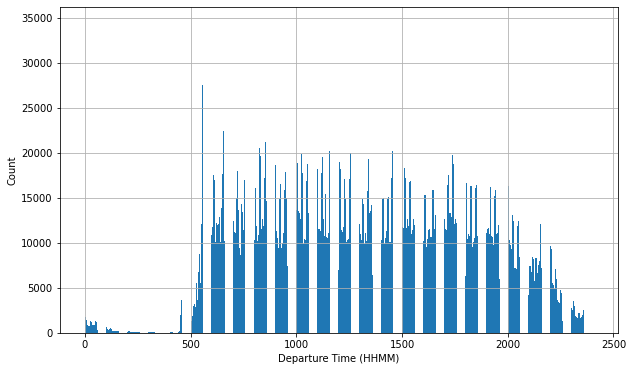

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['DEPARTURE_TIME'].hist(bins=1000)
plt.xlabel('Departure Time (HHMM)')
plt.ylabel('Count')
plt.show()

**Observations**


```
From this figure, we can observe that most flights are scheduled for departure between 5 (500) in the morning and 11 (2300) in the afternoon. We can also observe that between midnight and 5 in the morning very few flights are scheduled. 
This gap exists between each two consecutive hours..
```



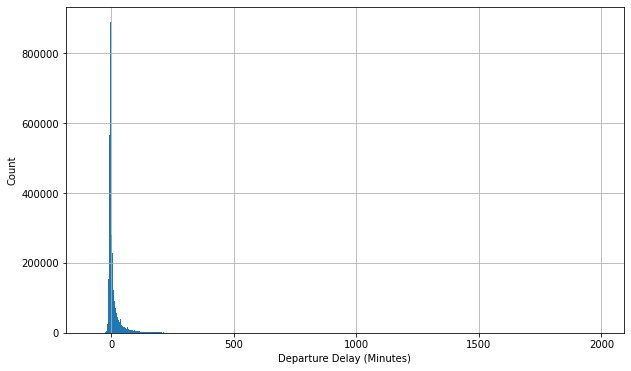

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['DEPARTURE_DELAY'].hist(bins=1000)
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Count')
plt.show()

Lets zoom in on the delays less than 240 minutes (4-hours).

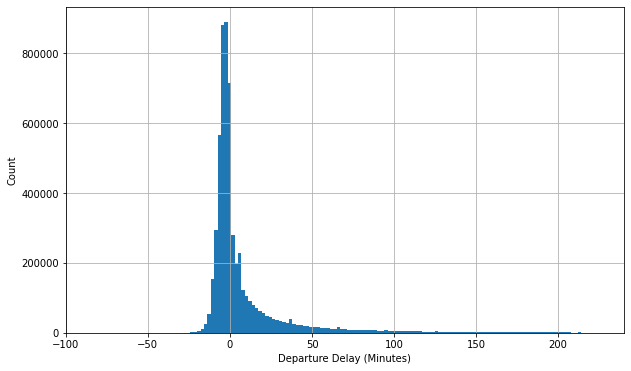

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['DEPARTURE_DELAY'].hist(bins=1000)
plt.xlabel('Departure Delay (Minutes)')
plt.xlim((-100,240))
plt.ylabel('Count')
plt.show()



```
We can see that most flights are actually up to 20 minutes in advance. This is quite unusual
```



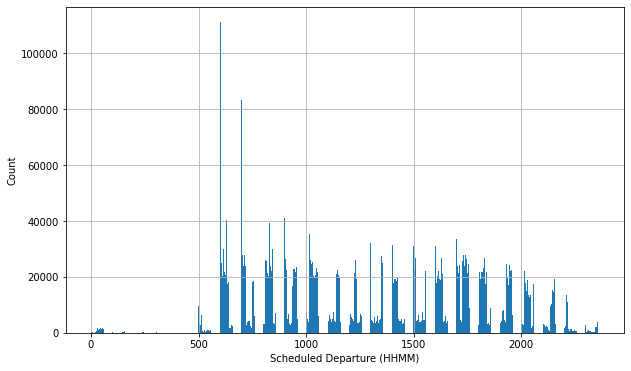

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['SCHEDULED_DEPARTURE'].hist(bins=1000)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Count')
plt.show()

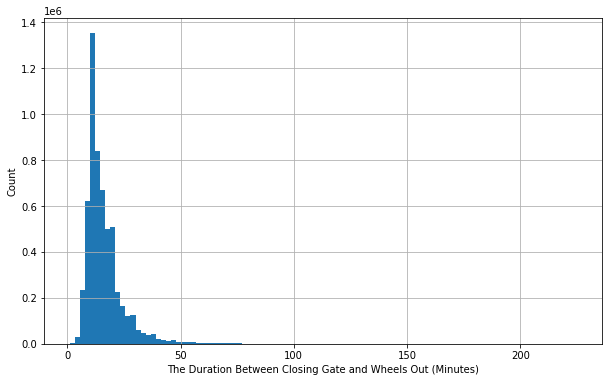

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['TAXI_OUT'].hist(bins=100)
plt.xlabel('The Duration Between Closing Gate and Wheels Out (Minutes)')
plt.ylabel('Count')
plt.show()

**Observations**


```
The distribution of the Taxi out duration is quite skewed to the right. This is quite logica
```



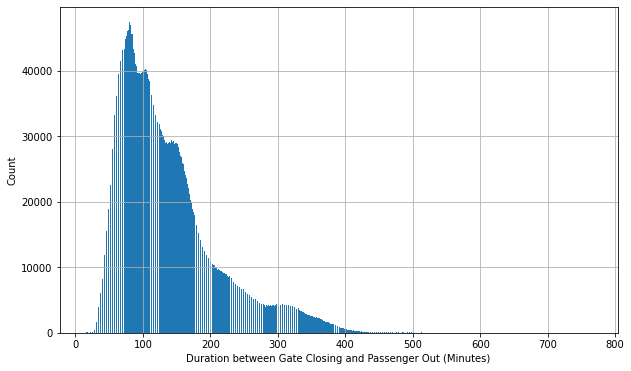

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['ELAPSED_TIME'].hist(bins=1000)
plt.xlabel('Duration between Gate Closing and Passenger Out (Minutes)')
plt.ylabel('Count')
plt.show()

**Observations**


```
We can observe that the distribution is skewed to the right. This means that most flights are of short length. 
This can be verified by plotting the Air time and the traveled distance.
```



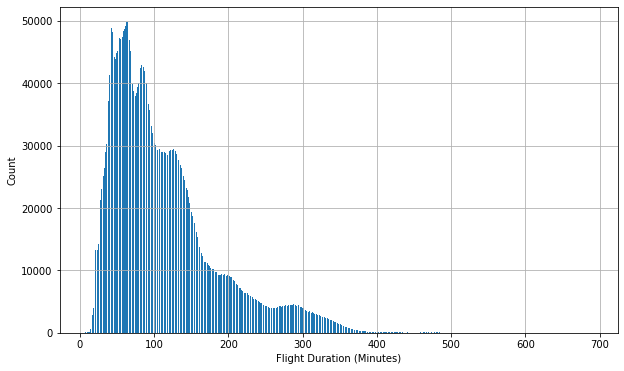

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['AIR_TIME'].hist(bins=1000)
plt.xlabel('Flight Duration (Minutes)')
plt.ylabel('Count')
plt.show()

**Observations**


```
We can see that the distribution is quite similar to the elapsed time distribution. We can also note the existance of several gaps in the time distribution. 
Is this due to the trips clusters? (i.e. range of distance?)
```



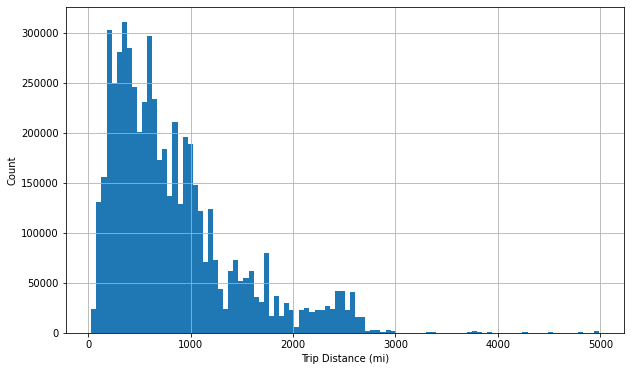

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['DISTANCE'].hist(bins=100)
plt.xlabel('Trip Distance (mi)')
plt.ylabel('Count')
plt.show()

**Observations**


```
The traveled distance is also right skewed. However, we cannot see the gabs as in the flight duration! 
I propose to further investigate this point when we get to the bivariate analysis.
```



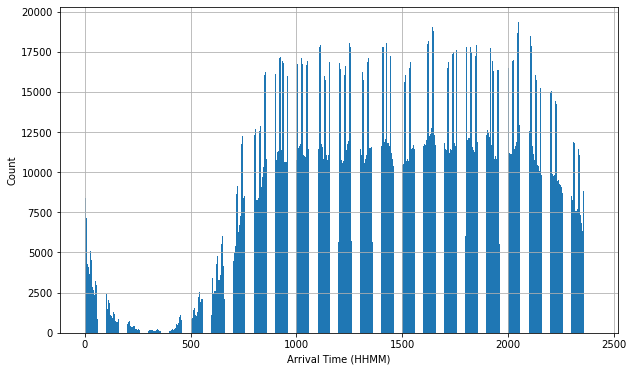

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['ARRIVAL_TIME'].hist(bins=1000)
plt.xlabel('Arrival Time (HHMM)')
plt.ylabel('Count')
plt.show()

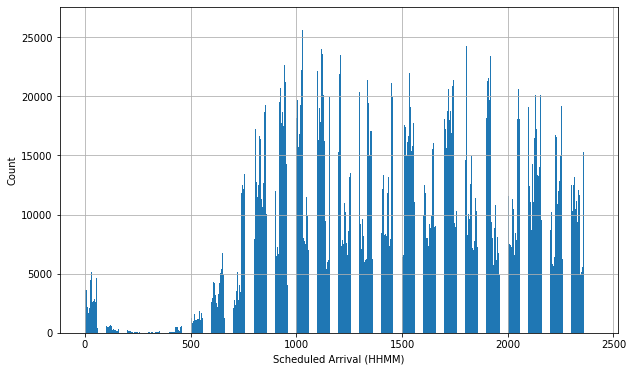

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['SCHEDULED_ARRIVAL'].hist(bins=1000)
plt.xlabel('Scheduled Arrival (HHMM)')
plt.ylabel('Count')
plt.show()

**Observations**


```
In the schedule arrival distribution, we can see the same patterns as in the scheduled departure. 
Most flights are during the day and very few are in the late night after midnight. 
Also, the same gab exists between the second half of each hour and the next hour.
```



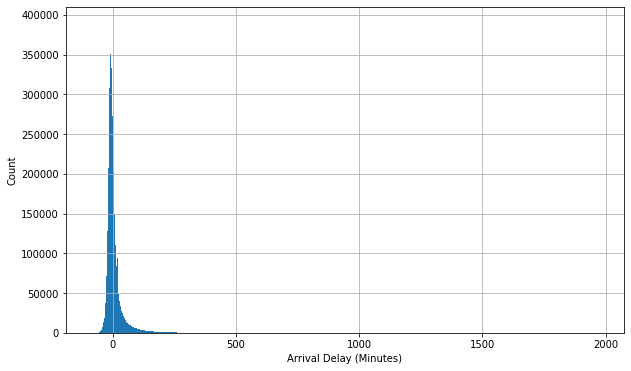

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['ARRIVAL_DELAY'].hist(bins=1000)
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Count')
plt.show()

**Observations**


```
The arrival delay has exactly the same shape of the departure delay. 
The distribution is right skewed and with most values are negative implying a big number of flights arriving in advance.
```



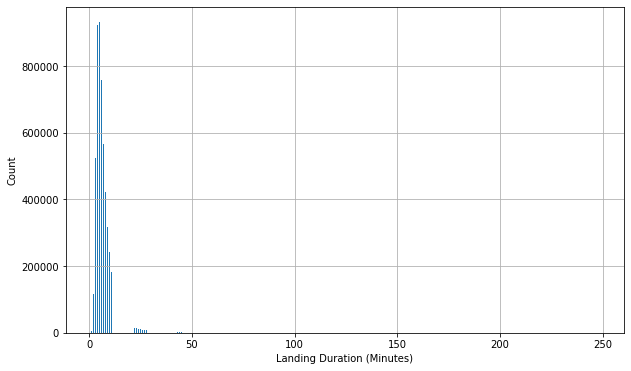

In [ ]:
plt.figure(figsize=(10,6))
cleaned_flights['TAXI_IN'].hist(bins=1000)
plt.xlabel('Landing Duration (Minutes)')
plt.ylabel('Count')
plt.show()

**Observations**


```
The landing process has almost the same duration needed as the take off.
```



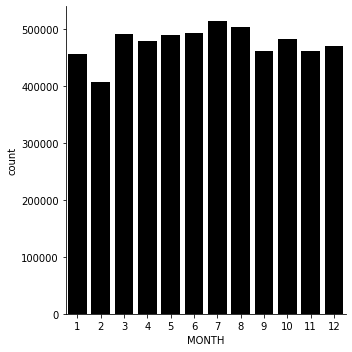

In [ ]:

sns.catplot(x='MONTH', kind='count', data=cleaned_flights,color='k')
plt.show()

**Observations**


```
From this figure, we can see that the number of flights is quite uniformally distributed over the months. 
The number of flights in February seems a bit lower that the other months but this could be simply because of the number of days.
```



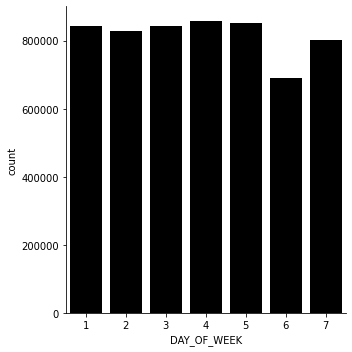

In [ ]:
sns.catplot(x='DAY_OF_WEEK', kind='count', data=cleaned_flights, color='k')
plt.show()

**Observations**


```
Lets note that the distribution of the flights is almost uniformally distributed 
over the days of the week with slightly less flights on the beginning of the weekend (saturday)
```



In [ ]:
cleaned_flights['ORIGIN_AIRPORT'].nunique(), cleaned_flights['DESTINATION_AIRPORT'].nunique()

(929, 929)

**Observations**


```
We have a big number of airports. Therefore, plotting the number of flights originated from or destinated will not be easy to interpret. 
Therefore, I propose to present the Top 10 and the Least Common 10 Origin Airports and the Top 10 and Least Common 10 Destinations.
```



Origin Airports:

In [ ]:
origin_air_flights = cleaned_flights.groupby('ORIGIN_AIRPORT', as_index=False)['FLIGHT_NUMBER'].count()
origin_air_flights.sort_values(by='FLIGHT_NUMBER',inplace=True, ignore_index=True)

In [ ]:
origin_air_flights.head(10)

,ORIGIN_AIRPORT,FLIGHT_NUMBER
0,12265,1
1,11097,1
2,11503,1
3,13459,1
4,13502,1
5,14025,1
6,15497,1
7,14222,1
8,11905,1
9,10333,2


**Observations**


```
If we plot these variables like this we will not be able to fully understand them. 
We need to get the names of the airport for the plots to be more intuitive. Unfortunatly, we do not have a full list of all airports. 
So the study is limited to airports in the USA.
```



In [ ]:
origin_air_flights = origin_air_flights.merge(airports_data[['IATA_CODE', 'AIRPORT', 'STATE', 'COUNTRY']],
                                              right_on='IATA_CODE', left_on='ORIGIN_AIRPORT')

In [ ]:
worst = origin_air_flights.iloc[:10,:]

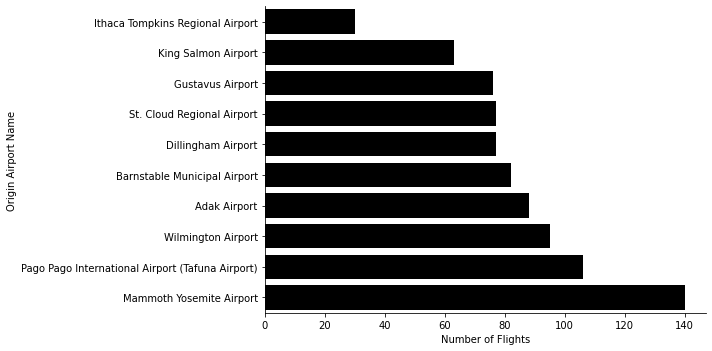

In [ ]:
sns.catplot(y='AIRPORT', x='FLIGHT_NUMBER', kind='bar', data=worst, 
            color='k', aspect=2)
plt.xlabel('Number of Flights')
plt.ylabel('Origin Airport Name')
plt.show()

In [ ]:
best = origin_air_flights.iloc[-10:,:]

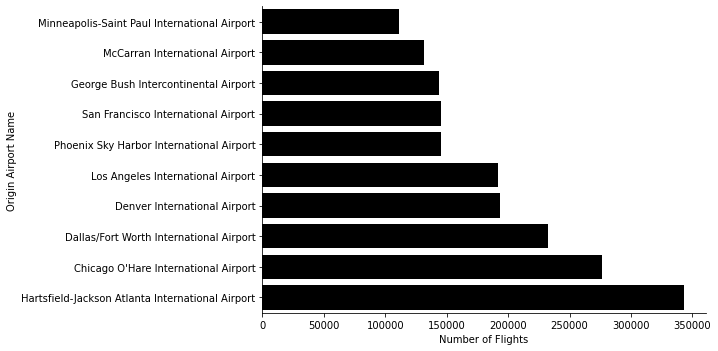

In [ ]:
sns.catplot(y='AIRPORT', x='FLIGHT_NUMBER', kind='bar', data=best, 
            color='k', aspect=2)
plt.xlabel('Number of Flights')
plt.ylabel('Origin Airport Name')
plt.show()

Destination Airports:

In [ ]:
dest_air_flights = cleaned_flights.groupby('DESTINATION_AIRPORT', as_index=False)['FLIGHT_NUMBER'].count()
dest_air_flights.sort_values(by='FLIGHT_NUMBER',inplace=True, ignore_index=True)

In [ ]:
dest_air_flights = dest_air_flights.merge(airports_data[['IATA_CODE', 'AIRPORT', 'STATE', 'COUNTRY']],
                                              right_on='IATA_CODE', left_on='DESTINATION_AIRPORT')

In [ ]:
worst = dest_air_flights.iloc[:10,:]

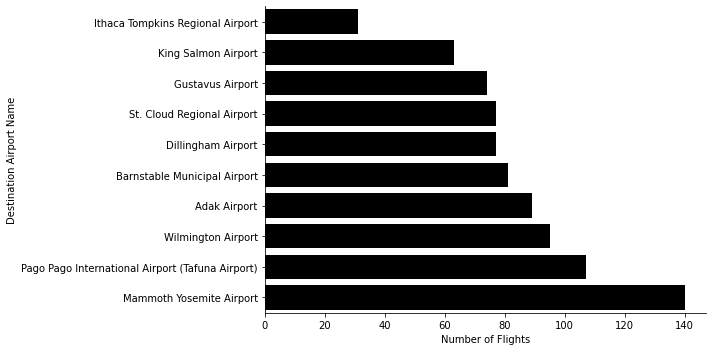

In [ ]:
sns.catplot(y='AIRPORT', x='FLIGHT_NUMBER', kind='bar', data=worst, 
            color='k', aspect=2)
plt.xlabel('Number of Flights')
plt.ylabel('Destination Airport Name')
plt.show()

In [ ]:
best = dest_air_flights.iloc[-10:,:]

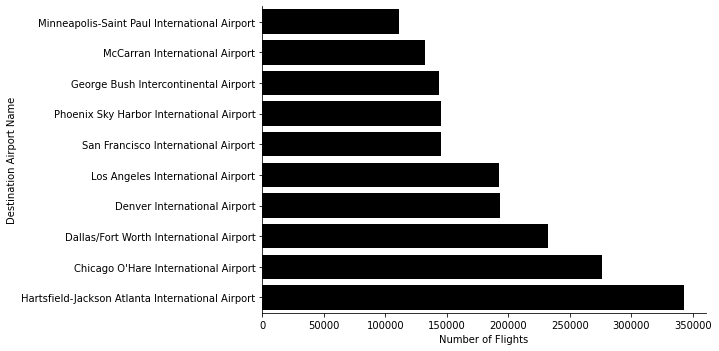

In [ ]:
sns.catplot(y='AIRPORT', x='FLIGHT_NUMBER', kind='bar', data=best, 
            color='k', aspect=2)
plt.xlabel('Number of Flights')
plt.ylabel('Destination Airport Name')
plt.show()

**Observations**


```
We can see that the same airports are the best destination and at the same time the most common departure airport. 
Lets figure out what flight trips are the most common during the whole year.
```



In [ ]:
air_trips = cleaned_flights.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], as_index=False)['FLIGHT_NUMBER'].count()
air_trips.sort_values(by='FLIGHT_NUMBER',inplace=True, ignore_index=True)

In [ ]:
air_trips['Trips'] = air_trips.apply(lambda x: str(x['ORIGIN_AIRPORT'])+'-'+str(x['DESTINATION_AIRPORT']),axis=1)

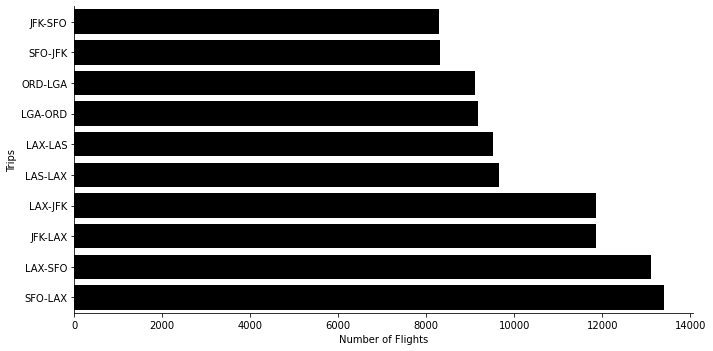

In [ ]:
sns.catplot(y='Trips', x='FLIGHT_NUMBER', kind='bar', 
            data=air_trips.iloc[-10:,:], 
            color='k', aspect=2)
plt.xlabel('Number of Flights')
plt.ylabel('Trips')
plt.show()

**Observations**


```
From this graph, we can see that the most two common trips are from the airport of San Francisco to Los Angeles and the inverse path. We can see that the trips are the most common with a slight difference in the number of flights. 
This observation is common for all 10 most common trips. From my small experience in the traveling world, most trips are scheduled in a round trip style. 
Last December when I visited Porto, the flights where scheduled in this way: Paris-Porto-Paris-Porto. In the same day, the airplane do one round trip between Porto and Paris then goes and stays in Porto.
```



**Bivarite data analyss** 

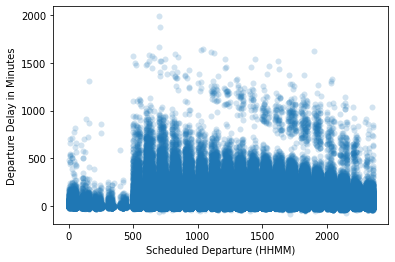

In [ ]:
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='DEPARTURE_DELAY', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Departure Delay in Minutes')
plt.show()

**Observations**


```
We can see that there is quite a relationship between the departure delay and the scheduled departure time. 
It seems like the two variables are negatively correlated. 
The latter the scheduled departure is the less delayed the flight tends to be.
```



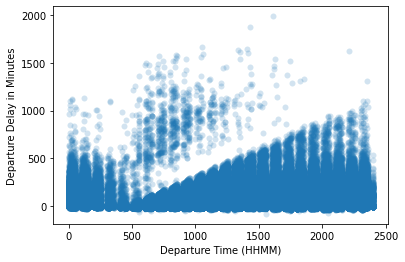

In [ ]:
sns.scatterplot(x='DEPARTURE_TIME', y='DEPARTURE_DELAY', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Departure Time (HHMM)')
plt.ylabel('Departure Delay in Minutes')
plt.show()

**Observations**


```
This is quite interesting. It seems like the behaviour betwee the actually departure time and the departure delay have a more positive correlation. 
This is quite logical. Because the actual departure time takes into account the departure delay (or the ahead of its intended departure). 
Therefore, the relationship should seem more linear.
```



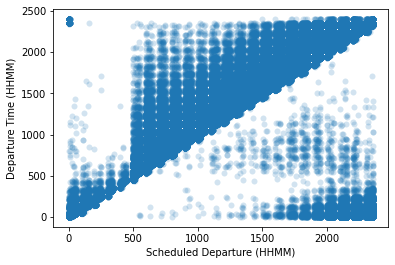

In [ ]:
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='DEPARTURE_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Departure Time (HHMM)')
plt.show()

**Observations**


```
This scatterpoint curve between the Scheduled departure and the actual departure time proves the previous point. 
Both variables are quite linearly positively dependent because to think of it:

Departure_Time=Scheduled_Departure+Departure_Delay
 
Moreover, the point at the top left corner and those on the bottom right corner are due to the representation of the Scheduled and Departure times in HHMM. 
Because once the Departure_time exceeds 2359 it moves back to 0. And when the flight is actually ahead of its time (i.e. the delay is negative). 
We can see a Scheduled_Departure at 0020 moves back to 2350 for example.
```



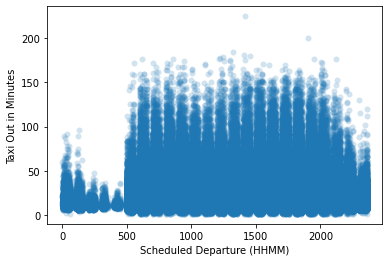

In [ ]:
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='TAXI_OUT', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Taxi Out in Minutes')
plt.show()

**Observations**


```
We cannot conclude on the relationship between the two variables. 
They seem quite independent.
```



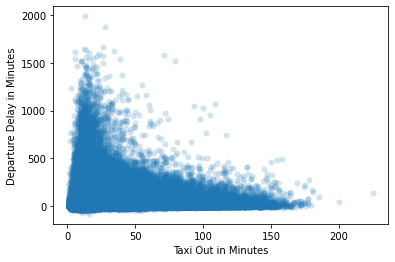

In [ ]:
sns.scatterplot(x='TAXI_OUT', y='DEPARTURE_DELAY', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Taxi Out in Minutes')
plt.show()

**Observations**


```
It seems like the Departure delay and the duration for taxi out are quite correlated but negatively. 
We can observe what it looks like an exponential relationship between the variables in which the higher the taxi out duration the lower the departure delay.
```



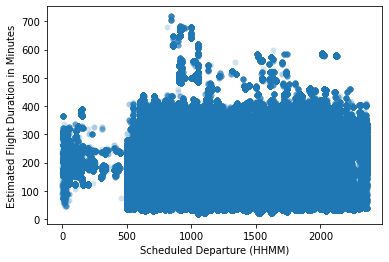

In [ ]:
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='SCHEDULED_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Estimated Flight Duration in Minutes')
plt.show()

**Observations**


```
We can see that the estimated flight duration is not correlation with the scheduled departure. 
We can see that the durations of flights are quite uniformally distributed on the scheduled departure. 
So the scheduling of flight seems to not take into account the duration of the flight
```



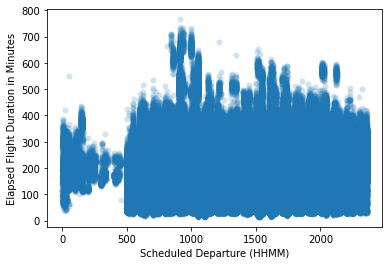

In [ ]:
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='ELAPSED_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Elapsed Flight Duration in Minutes')
plt.show()

**Observations**


```
The same goes for the elapsed time (real flight time).
```



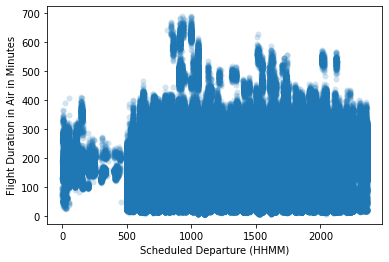

In [ ]:
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='AIR_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Scheduled Departure (HHMM)')
plt.ylabel('Flight Duration in Air in Minutes')
plt.show()

**Observations**


```
Since the elapsed time include the time spent in the air during the flight, it was quite expected to see the same graphe almost.

Now, lets see if the actual departure time has an influence on the time spent in the air. 
I know from my small experience that when the departure is late, pilots tend to speed up during in the air to reduce the delay. 
Ofcourse, the time spent in the air depends also on other factors like the loading of the airplane, the weather and most importantly the direction of wind
```



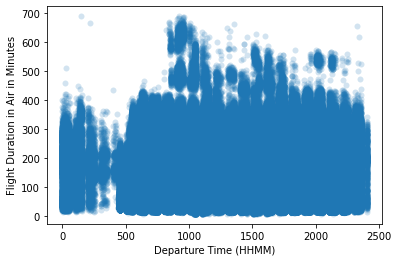

In [ ]:
sns.scatterplot(x='DEPARTURE_TIME', y='AIR_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Departure Time (HHMM)')
plt.ylabel('Flight Duration in Air in Minutes')
plt.show()

**Observations**


```
Well the graph is quite different from the previous ones but still we cannot conclude on the existance of a relationship. Lets try with the departure delay
```



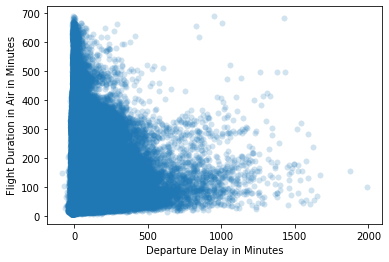

In [ ]:
sns.scatterplot(x='DEPARTURE_DELAY', y='AIR_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Flight Duration in Air in Minutes')
plt.show()

**Observations**


```
Well I guess after all the myth is quite true. The more delayed the flight is the less the duration of the flight in air is. 
So finally, the pilots seems to speed up in the air to reduce the arrival delay. However, the relationship is not linear.
 This is due also to multiple factors like distance, loading of the plane, and the direction of wind.

Previously we say that the distribution of the duration spent in air presents several gaps and I wondered if those gaps are not caused by the distance to travel.
```



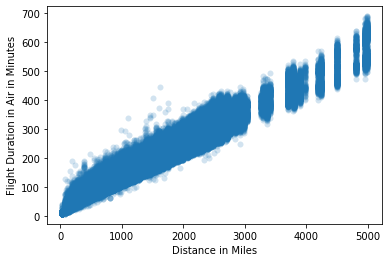

In [ ]:
sns.scatterplot(x='DISTANCE', y='AIR_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.show()

**Observations**


```
Well it is quite logical that the distance is linearly positvely correlated to the duration in the air. 
This graph also proves that the gaps we saw in the distribution of the air time are caused by the clusters of trips length (i.e. the distance).
```



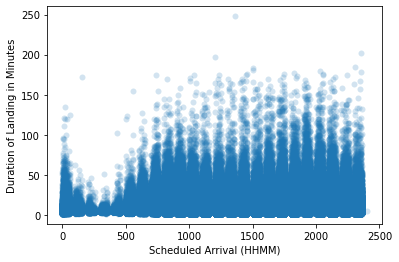

In [ ]:
sns.scatterplot(y='TAXI_IN', x='SCHEDULED_ARRIVAL', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.ylabel('Duration of Landing in Minutes')
plt.xlabel('Scheduled Arrival (HHMM)')
plt.show()

**Observations**


```
There is not a clear relationship between the landing duration and the scheduled arrival time. 
Lets see if the pilots rush the landing.
```



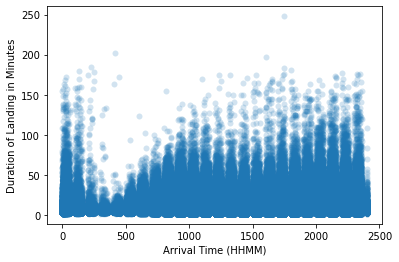

In [ ]:
sns.scatterplot(y='TAXI_IN', x='ARRIVAL_TIME', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.ylabel('Duration of Landing in Minutes')
plt.xlabel('Arrival Time (HHMM)')
plt.show()

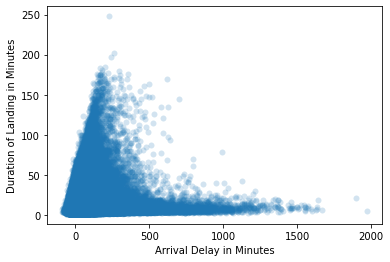

In [ ]:
sns.scatterplot(y='TAXI_IN', x='ARRIVAL_DELAY', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.ylabel('Duration of Landing in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.show()

**Observations**


```
It seems like the pilots rush the landing of the airplane when the flight is behind schedule. The higher the delay is the less time spent by the pilots to land.
However, this relationship is not linear it is more exponential. 
We should keep in mind that several other factors influence this relationship, like the airport (by specifying a tight time window for landing, and how much traffic there is in that hour), the landing is against or with the wind, etc.
```



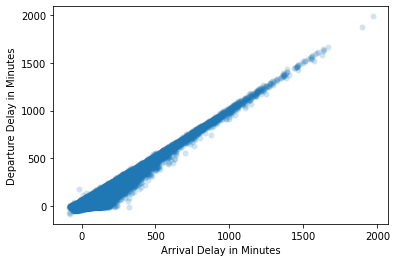

In [ ]:
sns.scatterplot(y='DEPARTURE_DELAY', x='ARRIVAL_DELAY', data=cleaned_flights, alpha=0.2, linewidth=0)
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.show()

**Observations**


```
This relationship is so obvious, once the flight is delayed in the take off it is delayed in the landing. However, 
this is true after a certain threshold that is computed while taking into account the distance to travel, the wind direction, and how fast the pilot can safely go.
```



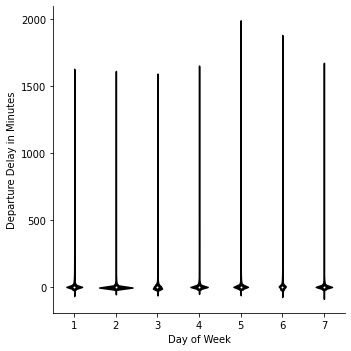

In [ ]:
sns.catplot(x='DAY_OF_WEEK', y='DEPARTURE_DELAY', data=cleaned_flights, kind='violin', color='k')
plt.xlabel('Day of Week')
plt.ylabel('Departure Delay in Minutes')
plt.show()

**Observations**


```
It seems like the duration of the departure delay is more important when we get closer to the weekends. 
We have more very long delays. Lets zoom in and see how the dalays are closely.
```



In [ ]:
cor = cleaned_flights[[x for x in cleaned_flights.columns if x not in ['YEAR', 'DAY', 'FLIGHT_NUMBER']]].corr()
cor

,MONTH,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
MONTH,1.000000,-0.009427,-0.000214,-0.004032,-0.021827,-0.013069,-0.004913,0.010337,0.001871,0.003379,0.010612,-0.008950,0.001937,-0.010361,-0.009164,-0.036793
DAY_OF_WEEK,-0.009427,1.000000,0.007737,0.005588,-0.011450,-0.020648,0.004048,0.014611,0.011510,0.014284,0.015931,0.005617,0.001034,0.006874,0.005621,-0.017027
SCHEDULED_DEPARTURE,-0.000214,0.007737,1.000000,0.963988,0.110419,0.006551,0.938134,-0.015846,-0.017935,-0.015756,-0.008854,0.657801,-0.044686,0.705042,0.631086,0.100220
DEPARTURE_TIME,-0.004032,0.005588,0.963988,1.000000,0.171840,0.013926,0.971992,-0.020817,-0.021990,-0.021146,-0.016426,0.677625,-0.040621,0.710183,0.650051,0.159787
DEPARTURE_DELAY,-0.021827,-0.011450,0.110419,0.171840,1.000000,0.058423,0.162664,0.027582,0.030805,0.023495,0.023957,0.059091,0.012479,0.097689,0.049652,0.944672
TAXI_OUT,-0.013069,-0.020648,0.006551,0.013926,0.058423,1.000000,0.039007,0.112274,0.205195,0.087608,0.072284,0.032684,0.003065,0.024307,0.029863,0.227319
WHEELS_OFF,-0.004913,0.004048,0.938134,0.971992,0.162664,0.039007,1.000000,-0.028287,-0.027133,-0.029654,-0.027562,0.697496,-0.038824,0.721840,0.669799,0.155773
SCHEDULED_TIME,0.010337,0.014611,-0.015846,-0.020817,0.027582,0.112274,-0.028287,1.000000,0.985260,0.990749,0.984438,0.023510,0.099190,0.032322,0.020561,-0.030029
ELAPSED_TIME,0.001871,0.011510,-0.017935,-0.021990,0.030805,0.205195,-0.027133,0.985260,1.000000,0.990033,0.973696,0.025644,0.156179,0.031246,0.022579,0.029120
AIR_TIME,0.003379,0.014284,-0.015756,-0.021146,0.023495,0.087608,-0.029654,0.990749,0.990033,1.000000,0.985643,0.022717,0.082292,0.029698,0.019383,-0.007108


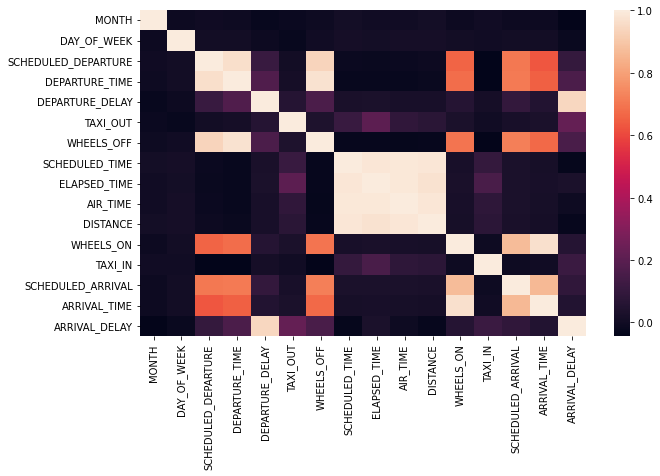

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
sns.heatmap(cor, ax=ax)
plt.show()

**Observations**


```
This obtained heatmap summarize the foundings in this section of the analysis by showing the features that are strongly correlated.
```



**Multivarite data analysis**


```
In this section, I focuse on some of the previous foundings to further investigate them. The idea is to find the relationship between several variables. 
However, the more variables we add the to plots/analysis the more complicated the analysis becomes. 
Therefore, I only show two examples on the interactions between three variables.
```



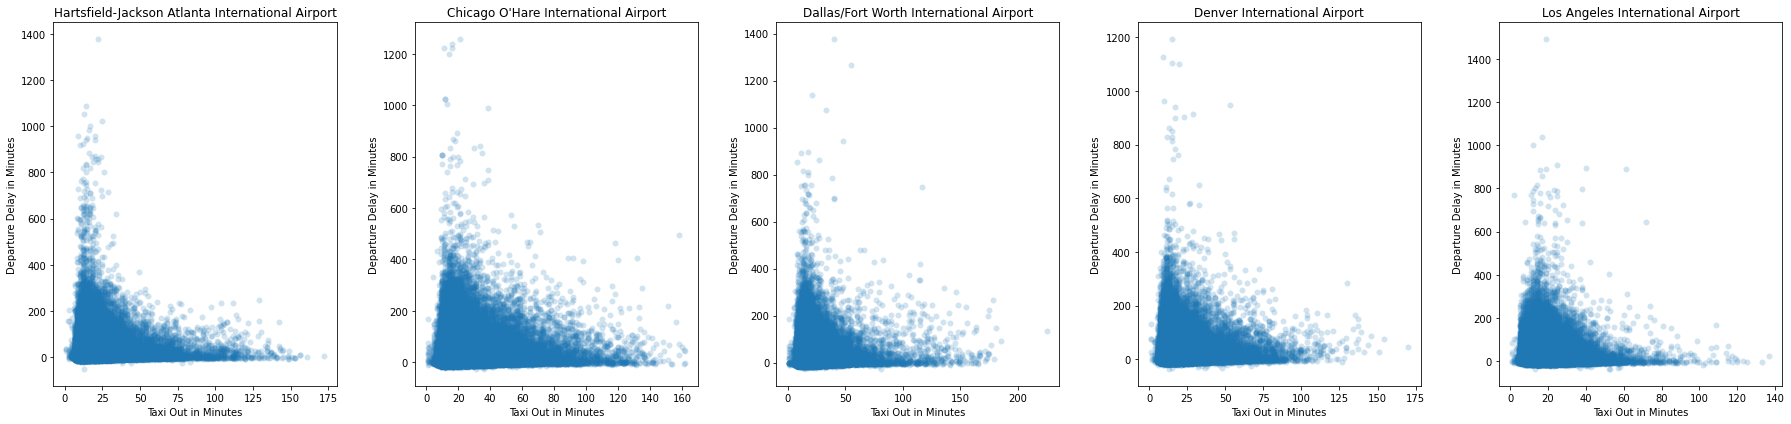

In [ ]:
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(1,5,1)
sns.scatterplot(x='TAXI_OUT', y='DEPARTURE_DELAY', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-1,0]],
                alpha=0.2, linewidth=0, ax=ax1)
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Taxi Out in Minutes')
plt.title(origin_air_flights.iloc[-1,3])
ax2 = fig.add_subplot(1,5,2)
sns.scatterplot(x='TAXI_OUT', y='DEPARTURE_DELAY', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-2,0]],
                alpha=0.2, linewidth=0, ax=ax2)
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Taxi Out in Minutes')
plt.title(origin_air_flights.iloc[-2,3])
ax3 = fig.add_subplot(1,5,3)
sns.scatterplot(x='TAXI_OUT', y='DEPARTURE_DELAY', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-3,0]],
                alpha=0.2, linewidth=0, ax=ax3)
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Taxi Out in Minutes')
plt.title(origin_air_flights.iloc[-3,3])
ax4 = fig.add_subplot(1,5,4)
sns.scatterplot(x='TAXI_OUT', y='DEPARTURE_DELAY', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-4,0]],
                alpha=0.2, linewidth=0, ax=ax4)
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Taxi Out in Minutes')
plt.title(origin_air_flights.iloc[-4,3])
ax5 = fig.add_subplot(1,5,5)
sns.scatterplot(x='TAXI_OUT', y='DEPARTURE_DELAY', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-5,0]],
                alpha=0.2, linewidth=0, ax=ax5)
plt.ylabel('Departure Delay in Minutes')
plt.xlabel('Taxi Out in Minutes')
plt.title(origin_air_flights.iloc[-5,3])
plt.tight_layout()
plt.show()

**Observations**


```
By Comparing the behaviour of the take off duration and the departure duration between the most common departure airports. 
we can see that the airport have an influence of these variables. We can see that the departure delay and the take off durations are more disperse for the Chicago O'Hare airport compared to other airports.
```



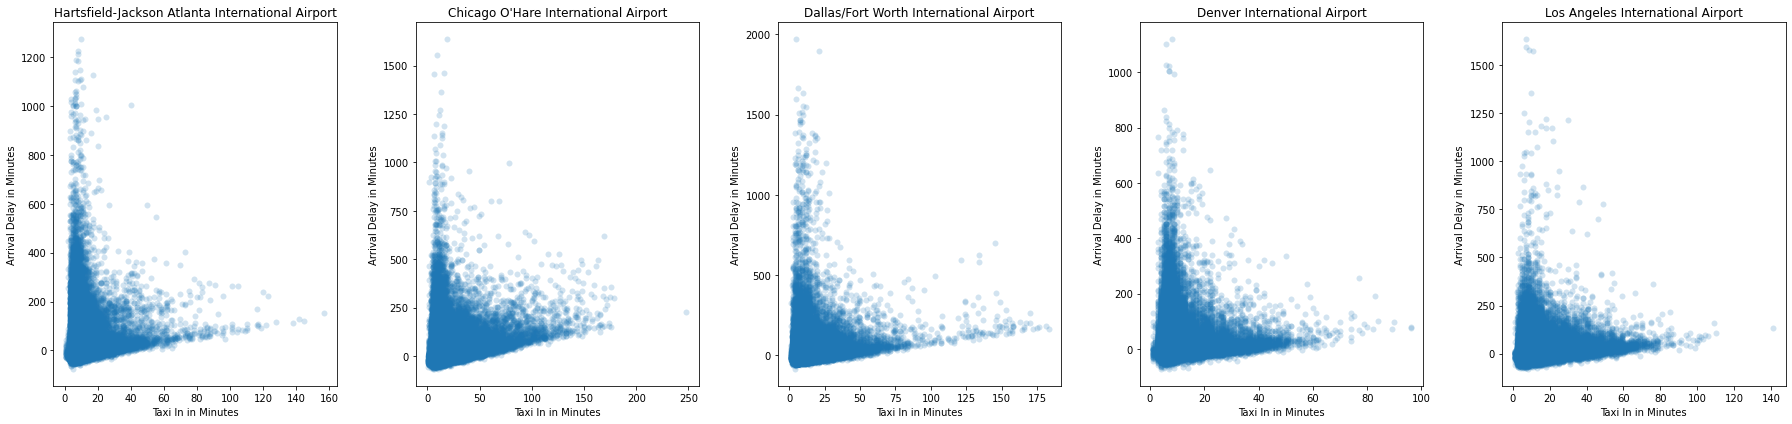

In [ ]:
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(1,5,1)
sns.scatterplot(x='TAXI_IN', y='ARRIVAL_DELAY', 
                data=cleaned_flights[cleaned_flights['DESTINATION_AIRPORT']==dest_air_flights.iloc[-1,0]],
                alpha=0.2, linewidth=0, ax=ax1)
plt.ylabel('Arrival Delay in Minutes')
plt.xlabel('Taxi In in Minutes')
plt.title(dest_air_flights.iloc[-1,3])
ax2 = fig.add_subplot(1,5,2)
sns.scatterplot(x='TAXI_IN', y='ARRIVAL_DELAY', 
                data=cleaned_flights[cleaned_flights['DESTINATION_AIRPORT']==dest_air_flights.iloc[-2,0]],
                alpha=0.2, linewidth=0, ax=ax2)
plt.ylabel('Arrival Delay in Minutes')
plt.xlabel('Taxi In in Minutes')
plt.title(dest_air_flights.iloc[-2,3])
ax3 = fig.add_subplot(1,5,3)
sns.scatterplot(x='TAXI_IN', y='ARRIVAL_DELAY', 
                data=cleaned_flights[cleaned_flights['DESTINATION_AIRPORT']==dest_air_flights.iloc[-3,0]],
                alpha=0.2, linewidth=0, ax=ax3)
plt.ylabel('Arrival Delay in Minutes')
plt.xlabel('Taxi In in Minutes')
plt.title(dest_air_flights.iloc[-3,3])
ax4 = fig.add_subplot(1,5,4)
sns.scatterplot(x='TAXI_IN', y='ARRIVAL_DELAY', 
                data=cleaned_flights[cleaned_flights['DESTINATION_AIRPORT']==dest_air_flights.iloc[-4,0]],
                alpha=0.2, linewidth=0, ax=ax4)
plt.ylabel('Arrival Delay in Minutes')
plt.xlabel('Taxi In in Minutes')
plt.title(dest_air_flights.iloc[-4,3])
ax5 = fig.add_subplot(1,5,5)
sns.scatterplot(x='TAXI_IN', y='ARRIVAL_DELAY', 
                data=cleaned_flights[cleaned_flights['DESTINATION_AIRPORT']==dest_air_flights.iloc[-5,0]],
                alpha=0.2, linewidth=0, ax=ax5)
plt.ylabel('Arrival Delay in Minutes')
plt.xlabel('Taxi In in Minutes')
plt.title(dest_air_flights.iloc[-5,3])
plt.tight_layout()
plt.show()

**Observations**


```
We can see that the distributions are influenced by the destination airport.
```



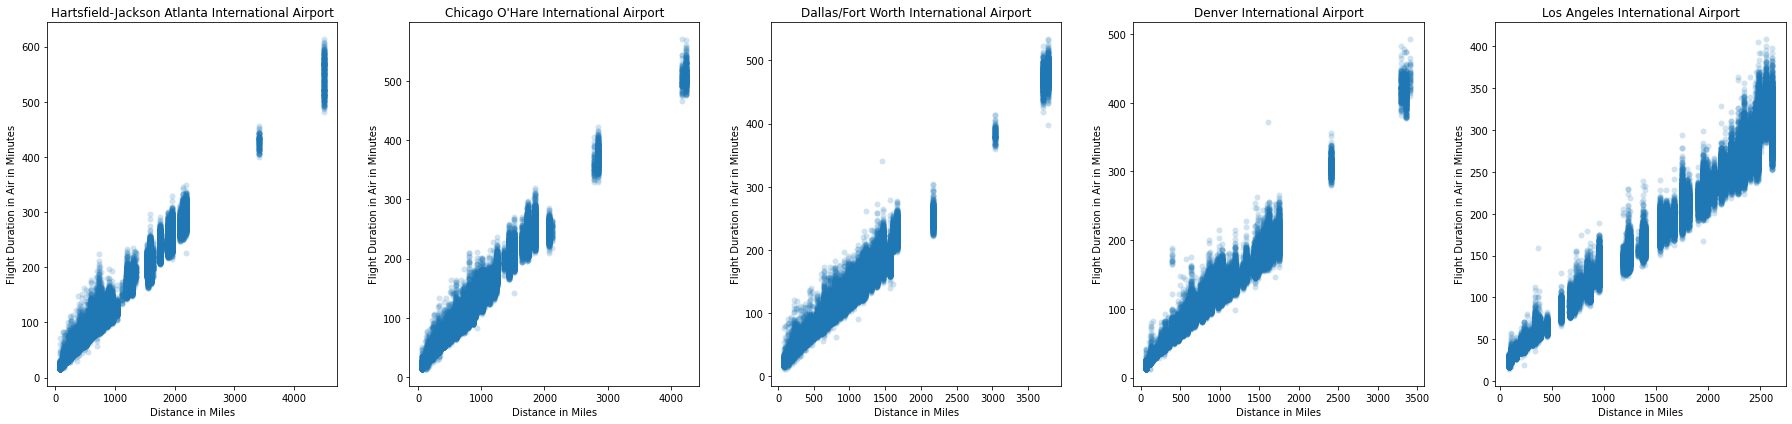

In [ ]:
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(1,5,1)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-1,0]],
                alpha=0.2, linewidth=0, ax=ax1)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-1,3])
ax2 = fig.add_subplot(1,5,2)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-2,0]],
                alpha=0.2, linewidth=0, ax=ax2)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-2,3])
ax3 = fig.add_subplot(1,5,3)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-3,0]],
                alpha=0.2, linewidth=0, ax=ax3)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-3,3])
ax4 = fig.add_subplot(1,5,4)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-4,0]],
                alpha=0.2, linewidth=0, ax=ax4)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-4,3])
ax5 = fig.add_subplot(1,5,5)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', 
                data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT']==origin_air_flights.iloc[-5,0]],
                alpha=0.2, linewidth=0, ax=ax5)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-5,3])
plt.tight_layout()
plt.show()

**Observations**


```
We can see from the graph of Los Angeles Airport the distance in miles and the flight duration are actually divided by cluster of trip.

To further investigate this point, I propose to create a trip feature in the cleaned_flights table and then plot the relationship between the distance of the trip and the flight duration in air.
```



In [ ]:
cleaned_flights['Trips'] = cleaned_flights.apply(lambda x: str(x['ORIGIN_AIRPORT'])+'-'+str(x['DESTINATION_AIRPORT']),axis=1)

In [ ]:
t = air_trips[air_trips['ORIGIN_AIRPORT'].isin(origin_air_flights.iloc[-5:,0].values)].iloc[-20:,3].values.tolist()

In [ ]:
aaa = cleaned_flights[cleaned_flights['Trips'].isin(t)]

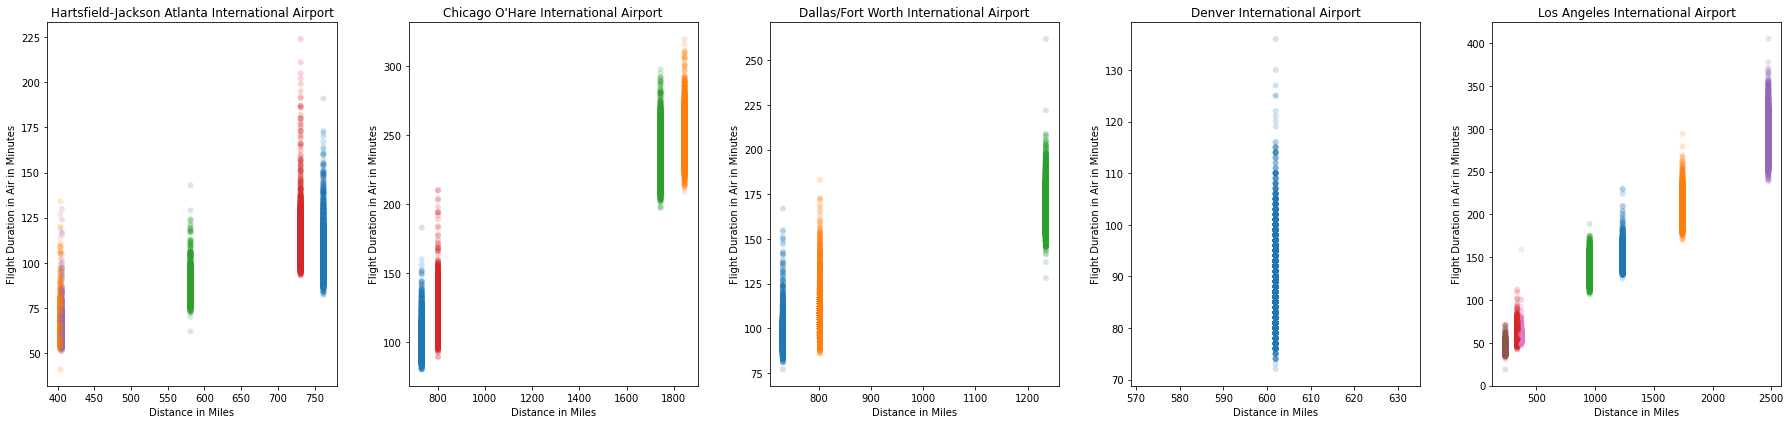

In [ ]:
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(1,5,1)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', hue='Trips',
                data=aaa[aaa['ORIGIN_AIRPORT']==origin_air_flights.iloc[-1,0]],
                alpha=0.2, linewidth=0, ax=ax1, legend=False)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-1,3])
ax2 = fig.add_subplot(1,5,2)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', hue='Trips',
                data=aaa[aaa['ORIGIN_AIRPORT']==origin_air_flights.iloc[-2,0]],
                alpha=0.2, linewidth=0, ax=ax2, legend=False)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-2,3])
ax3 = fig.add_subplot(1,5,3)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', hue='Trips',
                data=aaa[aaa['ORIGIN_AIRPORT']==origin_air_flights.iloc[-3,0]],
                alpha=0.2, linewidth=0, ax=ax3, legend=False)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-3,3])
ax4 = fig.add_subplot(1,5,4)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', hue='Trips',
                data=aaa[aaa['ORIGIN_AIRPORT']==origin_air_flights.iloc[-4,0]],
                alpha=0.2, linewidth=0, ax=ax4, legend=False)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-4,3])
ax5 = fig.add_subplot(1,5,5)
sns.scatterplot(x='DISTANCE', y='AIR_TIME', hue='Trips',
                data=aaa[aaa['ORIGIN_AIRPORT']==origin_air_flights.iloc[-5,0]],
                alpha=0.2, linewidth=0, ax=ax5, legend=False)
plt.xlabel('Distance in Miles')
plt.ylabel('Flight Duration in Air in Minutes')
plt.title(origin_air_flights.iloc[-5,3])
plt.tight_layout()
plt.show()

**Observations**


```
Now, it is even more clear that the gaps detected earlier are originated from the clusters of trips.
```

